In [167]:
import numpy as np
import cv2

In [168]:
# Load an color image in grayscale
img = cv2.imread('messi5.jpg',0)

In [169]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [170]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [171]:
cap = cv2.VideoCapture('vtest.avi')

while(cap.isOpened()):
    ret, frame = cap.read()
   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [172]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,255),2)

In [173]:
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

In [174]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

In [175]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,360,255,-1)

In [176]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

In [177]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

In [178]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [179]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print (events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [180]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
 if event == cv2.EVENT_LBUTTONDBLCLK:
  cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
 cv2.imshow('image',img)
 if cv2.waitKey(20) & 0xFF == 27:
  break
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [182]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
 global ix,iy,drawing,mode

 if event == cv2.EVENT_LBUTTONDOWN:
  drawing = True
  ix,iy = x,y
  
 elif event == cv2.EVENT_MOUSEMOVE:
  if drawing == True:
   if mode == True:
    cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
   else:
    cv2.circle(img,(x,y),5,(0,0,255),-1)

 elif event == cv2.EVENT_LBUTTONUP:
  drawing = False
  if mode == True:
   cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
  else:
   cv2.circle(img,(x,y),5,(0,0,255),-1)

In [183]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
 cv2.imshow('image',img)
 k = cv2.waitKey(1) & 0xFF
 if k == ord('m'):
  mode = not mode
 elif k == 27:
  break

cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [ ]:
def nothing(x):
 pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
 cv2.imshow('image',img)
 k = cv2.waitKey(1) & 0xFF
 if k == 27:
  break
 
 # get current positions of four trackbars
 r = cv2.getTrackbarPos('R','image')
 g = cv2.getTrackbarPos('G','image')
 b = cv2.getTrackbarPos('B','image')
 s = cv2.getTrackbarPos(switch,'image')
 if s == 0:
  img[:] = 0
 else:
  img[:] = [b,g,r]
cv2.destroyAllWindows()

In [50]:
import cv2
import numpy as np
img = cv2.imread('image.jpg')

In [7]:
px = img[100,100]
print (px)

# accessing only blue pixel
blue = img[100,200,0]
print (blue)

[100  30   1]
104


In [8]:
img[0:100,0:100] = [255,0,0]
print (img [100,100])


[100  30   1]


In [9]:
img.item(10,10,2)

img.item(10,10,2)


0

In [23]:
for x in range(100):
    for y in range(100):
        img.itemset((100+x,200+y,2),255)

In [11]:
print (img.shape)

(482, 728, 3)


In [12]:
print (img.size)


1052688


In [13]:
print (img.dtype)

uint8


In [14]:
ball = img[280:340, 330:390]

In [15]:
img[273:333, 100:160] = ball

In [25]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))


In [26]:
b = img[:,:,0]

In [54]:
img[:,:,1] = 0

In [53]:
print(img)

[[[89 25  1]
  [88 24  0]
  [89 25  1]
  ...
  [82 20  2]
  [82 20  2]
  [82 20  2]]

 [[89 25  1]
  [89 25  1]
  [89 25  1]
  ...
  [82 21  1]
  [82 21  1]
  [82 21  1]]

 [[89 25  1]
  [89 25  1]
  [89 25  1]
  ...
  [82 21  1]
  [82 21  1]
  [82 21  1]]

 ...

 [[22  3  0]
  [22  3  0]
  [22  3  0]
  ...
  [18  3  1]
  [18  3  1]
  [18  3  1]]

 [[22  3  0]
  [22  3  0]
  [22  3  0]
  ...
  [17  2  0]
  [17  2  0]
  [17  2  0]]

 [[22  3  0]
  [22  3  0]
  [22  3  0]
  ...
  [17  2  0]
  [17  2  0]
  [17  2  0]]]


In [18]:
img[:,:,2] = 0

In [52]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [91]:
BLUE = [255,0,0]

In [92]:
img1 = cv2.imread('opencv_logo.png')

In [93]:
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

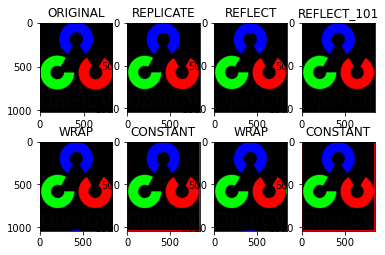

In [95]:
plt.subplot(241),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(242),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(243),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(244),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(245),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(246),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.subplot(247),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(248),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()